In [1]:
from daftlistings import Daft, RentType, RoomType, Gender
from daftlistings import Daft, SaleType
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import time

In [2]:
daft = Daft()

In [3]:
offset = 50

In [7]:
daft = Daft()
daft.set_county("Dublin City")
daft.set_area("Dublin 15")
daft.set_offset(offset)
daft.set_listing_type(SaleType.PROPERTIES)

listings = daft.search()


In [4]:
rent_typ = {'FLAT_TO_SHARE':RentType.FLAT_TO_SHARE,
'APARTMENT_TO_SHARE':RentType.APARTMENT_TO_SHARE,
'HOUSE_SHARE':RentType.HOUSE_SHARE,
'APARTMENTS':RentType.APARTMENTS,
'FLAT':RentType.FLAT,
'HOUSES':RentType.HOUSES,
'STUDIO':RentType.STUDIO}
import numpy as np

In [5]:
df = pd.DataFrame()
for rent_type in rent_typ:
    print(rent_type)
    offset = 0
    while True:
        daft = Daft()
        daft.set_county("Dublin City")
        daft.set_listing_type(rent_typ[rent_type])
        #daft.set_furnished(True)
        daft.set_room_type(RoomType.SINGLE_OR_DOUBLE)
        daft.set_offset(offset)
 
        listings = daft.search()

        if not listings:
            break

        for listing in listings:
            data = pd.DataFrame([listing.price,  listing.bedrooms,  listing.daft_link, listing.dwelling_type, listing.town, listing.county, listing.commercial_area_size]).T
            df = df.append(data)
        print(offset)
        print(df.shape)
        offset += 20
        time.sleep(np.round((np.random.rand(1)/5)[0],3))

FLAT_TO_SHARE
0
(20, 7)
20
(26, 7)
APARTMENT_TO_SHARE
0
(46, 7)
20
(66, 7)
40
(86, 7)
60
(106, 7)
80
(126, 7)
100
(146, 7)
120
(166, 7)
140
(186, 7)
160
(206, 7)
180
(226, 7)
200
(246, 7)
220
(266, 7)
240
(286, 7)
260
(306, 7)
280
(326, 7)
300
(346, 7)
320
(366, 7)
340
(386, 7)
360
(406, 7)
380
(426, 7)
400
(446, 7)
420
(466, 7)
440
(469, 7)
HOUSE_SHARE
0
(489, 7)
20
(509, 7)
40
(529, 7)
60
(549, 7)
80
(569, 7)
100
(589, 7)
120
(609, 7)
140
(629, 7)
160
(649, 7)
180
(669, 7)
200
(689, 7)
220
(709, 7)
240
(729, 7)
260
(749, 7)
280
(769, 7)
300
(789, 7)
320
(809, 7)
340
(829, 7)
360
(849, 7)
380
(869, 7)
400
(889, 7)
420
(909, 7)
440
(929, 7)
460
(949, 7)
480
(969, 7)
500
(989, 7)
520
(1009, 7)
540
(1029, 7)
560
(1049, 7)
580
(1069, 7)
600
(1089, 7)
620
(1109, 7)
640
(1129, 7)
660
(1149, 7)
680
(1169, 7)
700
(1189, 7)
720
(1209, 7)
740
(1229, 7)
760
(1249, 7)
780
(1269, 7)
800
(1289, 7)
820
(1309, 7)
840
(1329, 7)
860
(1349, 7)
880
(1369, 7)
900
(1389, 7)
920
(1409, 7)
940
(1429, 7)
960


In [6]:
df.columns = ["Price", 'Beds', 'URL', 'Type', 'jlcity', 'jlregion1', 'Detail']

In [7]:
df.Beds = df.Beds.str.replace('N/A', '99').str.replace('+', '').astype(float)
df = df[df.Beds!=99].copy()

In [8]:
df['Price2'] = df.Price.str.replace('€', '').str.replace(',','').str.extract('(\d+)').astype(float)

In [9]:
df['Period'] = ''
df.loc[df.Price.str.contains('eek'), 'Period'] = 'W'
df.loc[df.Price.str.contains('onth'), 'Period'] = 'M'


In [10]:
df['Annualized_Rent_Per_Room'] = 0
not_per_room = ['Apartment to Rent', 'House to Rent', 'Studio apartment to Rent', 'Flat to Rent']
df.loc[(df.Type.isin(not_per_room)), 'Beds'] = df[(df.Type.isin(not_per_room))].Detail.str.replace(' Beds', '').str.replace(' Bed', '').astype(int)
df.loc[df.Beds.isna(),'Beds'] = df[df.Beds.isna()].Detail.str[0]
df.Beds = df['Detail'].str.split(' Bed').str[0].astype(int)
df = df[df.Beds != 0].copy()
df.loc[(df.Period == 'W')&(~df.Type.isin(not_per_room)), 'Annualized_Rent_Per_Room'] = df[(df.Period == 'W')&(~df.Type.isin(not_per_room))].Price2*52
df.loc[(df.Period == 'W')&(df.Type.isin(not_per_room)), 'Annualized_Rent_Per_Room'] = df[(df.Period == 'W')&(df.Type.isin(not_per_room))].Price2*52/df[(df.Period == 'W')&(df.Type.isin(not_per_room))].Beds

df.loc[(df.Period == 'M')&(~df.Type.isin(not_per_room)), 'Annualized_Rent_Per_Room'] = df[(df.Period == 'M')&(~df.Type.isin(not_per_room))].Price2*12
df.loc[(df.Period == 'M')&(df.Type.isin(not_per_room)), 'Annualized_Rent_Per_Room'] = df[(df.Period == 'M')&(df.Type.isin(not_per_room))].Price2*12/df[(df.Period == 'M')&(df.Type.isin(not_per_room))].Beds

In [11]:
df['Annualized_Rent'] = df.Annualized_Rent_Per_Room
#df.loc[~df.Type.isin(not_per_room), 'Annualized_Rent'] = df[~df.Type.isin(not_per_room)].Annualized_Rent_Per_Room*df[~df.Type.isin(not_per_room)].Beds
df['Annualized_Rent'] = df.Annualized_Rent_Per_Room* df.Beds

In [14]:
df.sort_values('Annualized_Rent_Per_Room', ascending=False).reset_index(drop=True)#.iloc[0].loc['URL']

,Price,Beds,URL,Type,jlcity,jlregion1,Detail,Price2,Period,Annualized_Rent_Per_Room,Annualized_Rent
0,"€7,000 Per week",5,http://www.daft.ie/dublin/houses-for-rent/dalk...,House to Rent,Dalkey,Co. Dublin,5 Beds,7000.0,W,72800.0,364000.0
1,"€10,000 Per month",2,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Grand Canal Dock,Dublin 2,2 Beds,10000.0,M,60000.0,120000.0
2,"€4,500 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Merrion Square North,Dublin 2,1 Bed,4500.0,M,54000.0,54000.0
3,"€4,200 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Ringsend,Dublin 4,1 Bed,4200.0,M,50400.0,50400.0
4,"€4,200 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Ringsend,Dublin 4,1 Bed,4200.0,M,50400.0,50400.0
5,"€4,200 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Grand Canal Dock,Dublin 2,1 Bed,4200.0,M,50400.0,50400.0
6,"€4,200 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Grand Canal Dock,Dublin 2,1 Bed,4200.0,M,50400.0,50400.0
7,"€4,000 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Grand Canal Dock,Dublin 4,1 Bed,4000.0,M,48000.0,48000.0
8,"€4,000 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Ringsend,Dublin 4,1 Bed,4000.0,M,48000.0,48000.0
9,"€4,000 Per month",1,http://www.daft.ie/dublin/apartments-for-rent/...,Apartment to Rent,Grand Canal Dock,Dublin 4,1 Bed,4000.0,M,48000.0,48000.0


In [12]:
df2 = df.copy()

In [13]:
df2['Beds2'] = 1
df2.loc[df2.Beds > 1, 'Beds2'] = 2

In [14]:

df2['Type2'] = df2['Type']
df2['Type'] = df2.Type.str.replace(' to Rent', '').str.replace(' share', '')


In [15]:
df3 = df2.groupby(['Type', 'Beds2' , 'jlcity'])['Annualized_Rent', 'Annualized_Rent_Per_Room'].median().reset_index()

In [16]:
df3 = df2.groupby(['Type', 'Beds2' ,'jlregion1', 'jlcity'])['Annualized_Rent', 'Annualized_Rent_Per_Room'].apply(lambda x: np.minimum(np.median(x), np.mean(x))).reset_index()
df3['Rental_Count'] = df2.groupby(['Type', 'Beds2' ,'jlregion1', 'jlcity'])['Annualized_Rent'].count().reset_index()['Annualized_Rent']

In [17]:
from statsmodels.formula.api import ols
from daftlistings import Daft, SaleType
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [18]:
offset = 0
df = pd.DataFrame()
while True:
    daft = Daft()
    daft.set_county("Dublin City")
    daft.set_offset(offset)
    daft.set_listing_type(SaleType.PROPERTIES)

    listings = daft.search()

    if not listings:
        break

    for listing in listings:
        #time.sleep(np.round((np.random.rand(1)/5)[0],3))
        #d = Request().get(listing.daft_link)
        #try:
        #    area = d.find('div', {'class':"PropertyOverview__propertyOverviewDetails"}).contents[4].replace(' ', '').replace('\n','').replace('m', '')
        #    print(area)
            
        #except:
        #    area = ''
        data = pd.DataFrame([listing.price,  listing.bedrooms,  listing.bathrooms, listing.dwelling_type, listing.town, listing.county ,listing.daft_link]).T
        df = df.append(data)
    print(offset)
    print(df.shape)
    offset += 20
    time.sleep(np.round((np.random.rand(1)/5)[0],3))

0
(20, 7)
20
(40, 7)
40
(60, 7)
60
(80, 7)
80
(100, 7)
100
(120, 7)
120
(140, 7)
140
(160, 7)
160
(180, 7)
180
(200, 7)
200
(220, 7)
220
(240, 7)
240
(260, 7)
260
(280, 7)
280
(300, 7)
300
(320, 7)
320
(340, 7)
340
(360, 7)
360
(380, 7)
380
(400, 7)
400
(420, 7)
420
(440, 7)
440
(460, 7)
460
(480, 7)
480
(500, 7)
500
(520, 7)
520
(540, 7)
540
(560, 7)
560
(580, 7)
580
(600, 7)
600
(620, 7)
620
(640, 7)
640
(660, 7)
660
(680, 7)
680
(700, 7)
700
(720, 7)
720
(740, 7)
740
(760, 7)
760
(780, 7)
780
(800, 7)
800
(820, 7)
820
(840, 7)
840
(860, 7)
860
(880, 7)
880
(900, 7)
900
(920, 7)
920
(940, 7)
940
(960, 7)
960
(980, 7)
980
(1000, 7)
1000
(1020, 7)
1020
(1040, 7)
1040
(1060, 7)
1060
(1080, 7)
1080
(1100, 7)
1100
(1120, 7)
1120
(1140, 7)
1140
(1160, 7)
1160
(1180, 7)
1180
(1200, 7)
1200
(1220, 7)
1220
(1240, 7)
1240
(1260, 7)
1260
(1280, 7)
1280
(1300, 7)
1300
(1320, 7)
1320
(1340, 7)
1340
(1360, 7)
1360
(1380, 7)
1380
(1400, 7)
1400
(1420, 7)
1420
(1440, 7)
1440
(1460, 7)
1460
(1480, 7)

In [22]:
df.columns = ["Price", 'Beds', 'Baths', 'Type', 'jlcity', 'jlregion1', 'URL']
df = df[~df.isna().any(axis=1)].copy()
df = df[~df.Price.str.contains("Price")].copy()
df.Price = df.Price.str.replace('€', '').str.replace(',','').str.extract('(\d+)').astype(float)
df.Beds = df.Beds.str.replace('N/A', '99').str.replace('+', '').astype(int)
df = df[df.Beds!=99]

df.Baths = df.Baths.str.replace('N/A', '99').str.replace('+', '').astype(int)
df = df[df.Baths!=99]

df.drop_duplicates(inplace=True)

In [23]:
df['Type2'] = df.Type

In [24]:
df['Beds2'] = 1
df.loc[df.Beds > 1, 'Beds2'] = 2

In [25]:
df.loc[df['Type'].str.contains('House'), 'Type'] = 'House'
df.loc[df['Type'].str.contains('Apartment'), 'Type'] = 'Apartment'
df.loc[~df['Type'].str.contains('Apartment'), 'Type'] = 'House'


In [26]:
d = pd.merge(left=df, right=df3, how='left', right_on=['Type', 'Beds2' ,'jlregion1', 'jlcity'], left_on = ['Type', 'Beds2' ,'jlregion1', 'jlcity'])

In [27]:
dd=d[~d.Annualized_Rent_Per_Room.isna()].copy()

In [28]:
dd['Annualized_Rent'] = dd.Annualized_Rent_Per_Room*dd.Beds

In [29]:
dd['Return'] = dd.Annualized_Rent/dd.Price

In [30]:
dd['Rent_Per_Room'] = (dd.Annualized_Rent_Per_Room/12).astype(int)

In [31]:
dd[(dd.Price < 250000)&(dd.Rental_Count>3)].groupby('Beds')['Return'].median().sort_values()

Beds
0    0.000000
1    0.054383
2    0.091056
3    0.100941
4    0.122307
5    0.264609
Name: Return, dtype: float64

0       0
1       1
3       0
4       1
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      1
28      1
29      1
30      0
       ..
4145    0
4146    0
4147    1
4148    0
4149    1
4150    0
4152    0
4153    0
4154    0
4155    1
4156    0
4157    1
4158    0
4159    0
4160    0
4161    0
4162    1
4163    1
4165    0
4167    0
4168    1
4169    1
4170    1
4171    1
4173    0
4175    0
4176    1
4177    0
4178    1
4179    0
Name: jlregion1, Length: 3616, dtype: int32

In [75]:
con = (dd.Price<250000) & (dd.jlregion1.str.split(' ').apply(lambda x:x[1]).replace({'Dublin':0, '6W':0}).astype(int) %2 ==1)
con *= con & (dd.Beds>2)
for i in range(100):
    if 'house' in dd[con].sort_values('Return', ascending=False).iloc[i].URL:
        url = dd[con].sort_values('Return', ascending=False).iloc[i].URL
        ret = dd[con].sort_values('Return', ascending=False).iloc[i].Return
        pri = dd[con].sort_values('Return', ascending=False).iloc[i].Price
        print(url)
        print(ret)
        print(pri)

C:\Users\Aidan\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


http://www.daft.ie/dublin/houses-for-sale/finglas/44-cappagh-drive-finglas-dublin-2177701/
0.15582972101811712
149950.0
http://www.daft.ie/dublin/houses-for-sale/blanchardstown/83-fortlawn-avenue-blanchardstown-dublin-1989816/
0.15395454545454546
165000.0
http://www.daft.ie/dublin/houses-for-auction/cabra/15-saint-attracta-cabra-dublin-2303914/
0.15081818181818182
220000.0
http://www.daft.ie/dublin/houses-for-sale/finglas/1-virginia-park-finglas-dublin-2174064/
0.14164835442398524
219950.0
http://www.daft.ie/dublin/houses-for-sale/finglas/51-fairlawn-road-finglas-dublin-2162745/
0.1416161616161616
165000.0
http://www.daft.ie/dublin/houses-for-sale/finglas/449-casement-road-finglas-dublin-2303765/
0.12984186520339885
239950.0
http://www.daft.ie/dublin/houses-for-sale/ballymun/24-gateway-crescent-ballymun-ballymun-dublin-2317057/
0.12923076923076923
169000.0
http://www.daft.ie/dublin/houses-for-sale/tyrrelstown/41-the-boulevard-mount-eustace-tyrrelstown-dublin-2163800/
0.1265020072123562

IndexError: single positional indexer is out-of-bounds

In [45]:
dd[(dd.jlregion1.isin(['Dublin 17']))].sort_values('Return', ascending=False)#.iloc[1].URL

,Price,Beds,Baths,Type,jlcity,jlregion1,URL,Type2,Beds2,Annualized_Rent,Annualized_Rent_Per_Room,Rental_Count,Return,Rent_Per_Room
2284,275000.0,3,2,Apartment,Clarehall,Dublin 17,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,24000.0,8000.0,1.0,0.087273,666


In [47]:
dd.sort_values('Return',ascending=False)#.isin(['Santry'])

,Price,Beds,Baths,Type,jlcity,jlregion1,URL,Type2,Beds2,Annualized_Rent,Annualized_Rent_Per_Room,Rental_Count,Return,Rent_Per_Room
88,160000.0,5,2,House,Blanchardstown,Dublin 15,http://www.daft.ie/dublin/bungalows-for-auctio...,Bungalow for sale,2,42337.500000,8467.500000,8.0,0.264609,705
3492,259000.0,6,2,House,Ballyfermot,Dublin 10,http://www.daft.ie/dublin/houses-for-sale/ball...,End of Terrace House,2,52800.000000,8800.000000,2.0,0.203861,733
456,350000.0,6,3,House,Phibsborough,Dublin 7,http://www.daft.ie/dublin/houses-for-sale/phib...,Semi-Detached House,2,59280.000000,9880.000000,8.0,0.169371,823
768,195000.0,3,1,Apartment,Santry,Dublin 9,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,31464.923077,10488.307692,13.0,0.161359,874
3298,184950.0,3,1,Apartment,Ballymun,Dublin 11,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,29700.000000,9900.000000,1.0,0.160584,825
1434,250000.0,3,1,Apartment,Harold'S Cross,Dublin 6,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,39600.000000,13200.000000,2.0,0.158400,1100
1050,180000.0,2,1,Apartment,East Wall,Dublin 3,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,28300.000000,14150.000000,6.0,0.157222,1179
710,195000.0,3,1,Apartment,Lucan,Co. Dublin,http://www.daft.ie/dublin/apartments-for-sale/...,Apartment for sale,2,30433.200000,10144.400000,5.0,0.156068,845
3201,149950.0,3,1,House,Finglas,Dublin 11,http://www.daft.ie/dublin/houses-for-sale/fing...,Terraced House,2,23366.666667,7788.888889,9.0,0.155830,649
4009,165000.0,3,1,House,Blanchardstown,Dublin 15,http://www.daft.ie/dublin/houses-for-sale/blan...,Terraced House,2,25402.500000,8467.500000,8.0,0.153955,705


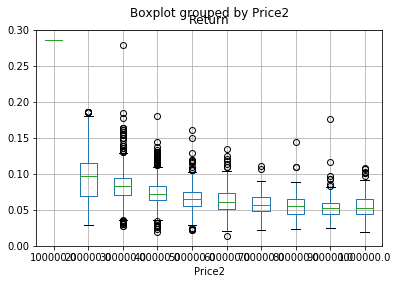

In [50]:
dd[dd.Price < 1000000].boxplot('Return', by='Price2')

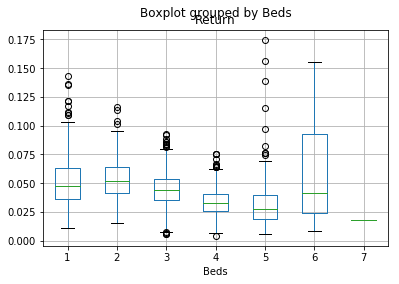

In [44]:
dd.boxplot('Return', by='Beds')

In [49]:
dd['Price2'] = (dd.Price + 50000).round(decimals=-5)

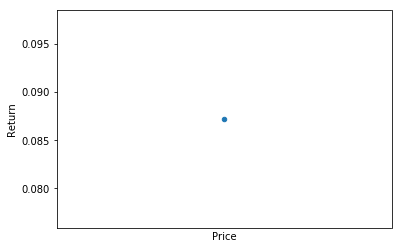

In [49]:
dd[(dd.Price < 600000)&(dd.jlregion1 == 'Dublin 10')].plot(kind='scatter', x='Price', y='Return', logx=True)

In [290]:
dd.groupby('Type')['Return'].median().sort_values(ascending=False)

Type
Apartment    0.054982
House        0.040508
Name: Return, dtype: float64

In [48]:
dd.groupby('jlregion1')['Return'].median().sort_values(ascending=False)

jlregion1
Dublin 10     0.087196
Dublin 24     0.063913
Dublin 1      0.058660
Dublin 20     0.056250
Dublin 22     0.054694
Dublin 2      0.054535
Dublin 12     0.054308
Dublin 17     0.054162
Dublin 11     0.052913
Dublin 9      0.047657
Dublin 15     0.047429
Dublin 5      0.045271
Dublin 7      0.043876
Dublin 18     0.043497
Dublin 8      0.043146
Dublin 13     0.042384
Co. Dublin    0.040404
Dublin 16     0.039792
Dublin 4      0.039600
Dublin 6W     0.039543
Dublin 3      0.038516
Dublin 6      0.033867
Dublin 14     0.033274
Name: Return, dtype: float64

In [227]:
df2[(df2.Type == 'Apartment')&(df2.jlcity == 'Ifsc')&(df2.Beds == 1)].Annualized_Rent_Per_Room.mean()#.iloc[0].URL

30045.0